In [2]:
# Phase 1: Install and import all necessary libraries
!pip install --quiet yfinance pandas requests beautifulSoup4 plotly
# Import librabries for use in this notebook
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go


In [3]:
# Phase 2: Data extraction for all stocks
# Objective: Extract historical share price and quarterly revenue for TSLA,AMZN,AMD,GME
# Approach: We will define a list of tickers and loop through them using yfinance.ticker to fetch the required data

# Define the list of stock ticker symbols
stocks = ["TSLA", "AMZN", "AMD", "GME"]

# Initialize dictionaries to store extracted data
# These dictionaries will hold Pandas DataFrames/Series for each stock
all_stock_historical_data = {}
all_stock_quarterly_revenue = {}

print("Step 2: Starting data extraction for all stocks...")

# Loop through each ticker symbol to fetch data
for ticker_symbol in stocks:
    print(f"\n--- Processing data for {ticker_symbol} ---")
    ticker = yf.Ticker(ticker_symbol)

    # 2.1: Extract Historical Share Price
    try:
        # Fetch max available historical data for comprehensive analysis
        hist_price = ticker.history(period="max")
        if not hist_price.empty:
            all_stock_historical_data[ticker_symbol] = hist_price
            print(f"   Successfully downloaded {len(hist_price)} historical price rows for {ticker_symbol}.")
            # Optional: Display first few rows to quickly check data format
            # print(hist_price.head())
        else:
            print(f"   No historical price data found for {ticker_symbol}.")
    except Exception as e:
        print(f"   Error downloading historical price for {ticker_symbol}: {e}")

    # 2.2: Extract Quarterly Revenue Reportings
    try:
        q_financials = ticker.quarterly_income_stmt
        if not q_financials.empty and 'Total Revenue' in q_financials.index:
            # Extract 'Total Revenue' row and sort by date (oldest first)
            revenue_data = q_financials.loc['Total Revenue'].sort_index()
            all_stock_quarterly_revenue[ticker_symbol] = revenue_data
            print(f"   Successfully downloaded quarterly 'Total Revenue' for {ticker_symbol}.")
            # print(revenue_data.tail()) # Display last few quarters
        elif not q_financials.empty and 'Sales Revenue' in q_financials.index:
            # Fallback for companies that use 'Sales Revenue' instead of 'Total Revenue'
            revenue_data = q_financials.loc['Sales Revenue'].sort_index()
            all_stock_quarterly_revenue[ticker_symbol] = revenue_data
            print(f"   Successfully downloaded quarterly 'Sales Revenue' for {ticker_symbol}.")
            # print(revenue_data.tail())
        else:
            print(f"   Could not find 'Total Revenue' or 'Sales Revenue' in quarterly income statement for {ticker_symbol}. Quarterly data might be empty.")
            all_stock_quarterly_revenue[ticker_symbol] = pd.Series(dtype='float64') # Store an empty Series for consistency
    except Exception as e:
        print(f"   Error downloading quarterly financials for {ticker_symbol}: {e}")

print("\nStep 2: Data extraction complete for all stocks.")

# --- Quick Verification ---
print("\n--- Data Collection Summary ---")
for ticker_symbol in stocks:
    price_status = "Available" if ticker_symbol in all_stock_historical_data and not all_stock_historical_data[ticker_symbol].empty else "NOT found"
    revenue_status = "Available" if ticker_symbol in all_stock_quarterly_revenue and not all_stock_quarterly_revenue[ticker_symbol].empty else "NOT found"
    print(f"{ticker_symbol}: Historical Price - {price_status}, Quarterly Revenue - {revenue_status}")

# I can inspect specific DataFrames/Series in new cells, e.g.:
# print("\nExample: Amazon Historical Data Head:")
# print(all_stock_historical_data['AMZN'].head())
#
# print("\nExample: GameStop Quarterly Revenue:")
# print(all_stock_quarterly_revenue['GME'])

Step 2: Starting data extraction for all stocks...

--- Processing data for TSLA ---
   Successfully downloaded 3777 historical price rows for TSLA.
   Successfully downloaded quarterly 'Total Revenue' for TSLA.

--- Processing data for AMZN ---
   Successfully downloaded 7078 historical price rows for AMZN.
   Successfully downloaded quarterly 'Total Revenue' for AMZN.

--- Processing data for AMD ---
   Successfully downloaded 11418 historical price rows for AMD.
   Successfully downloaded quarterly 'Total Revenue' for AMD.

--- Processing data for GME ---
   Successfully downloaded 5885 historical price rows for GME.
   Successfully downloaded quarterly 'Total Revenue' for GME.

Step 2: Data extraction complete for all stocks.

--- Data Collection Summary ---
TSLA: Historical Price - Available, Quarterly Revenue - Available
AMZN: Historical Price - Available, Quarterly Revenue - Available
AMD: Historical Price - Available, Quarterly Revenue - Available
GME: Historical Price - Availa


--- Phase 3: Data Visualization for TSLA ---
Step 3.1: Generating visualizations for TSLA...


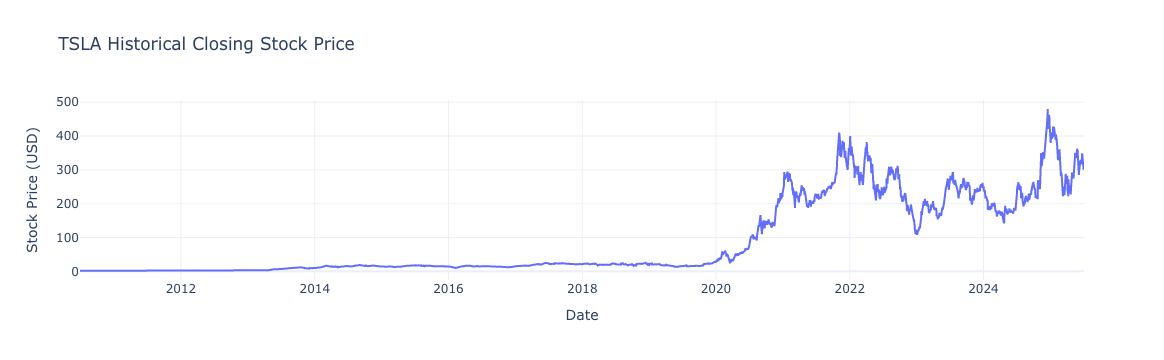

    TSLA Historical Price Chart generated.


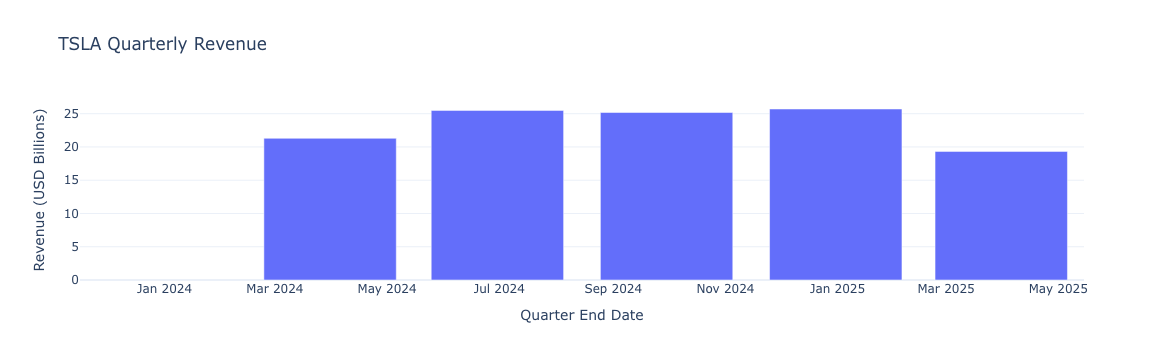

    TSLA Quarterly Revenue Chart generated.
Step 3.1: Visualizations for TSLA complete.

--- Phase 3: Data Visualization for AMZN ---
Step 3.1: Generating visualizations for AMZN...


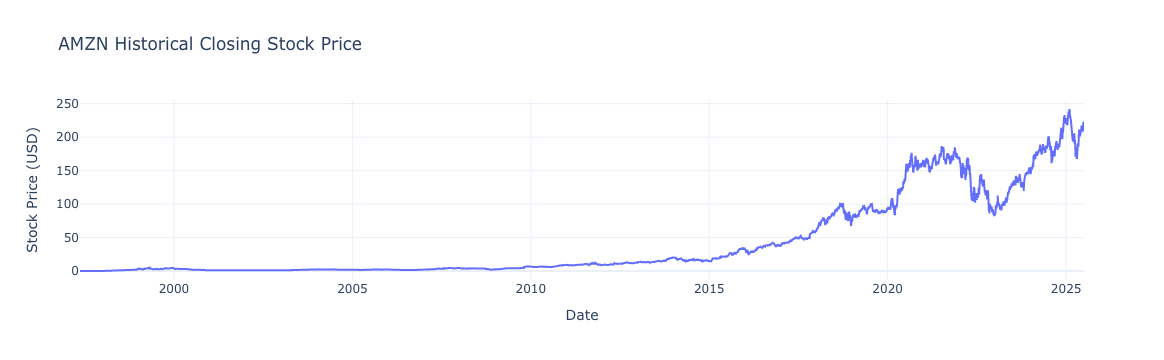

    AMZN Historical Price Chart generated.


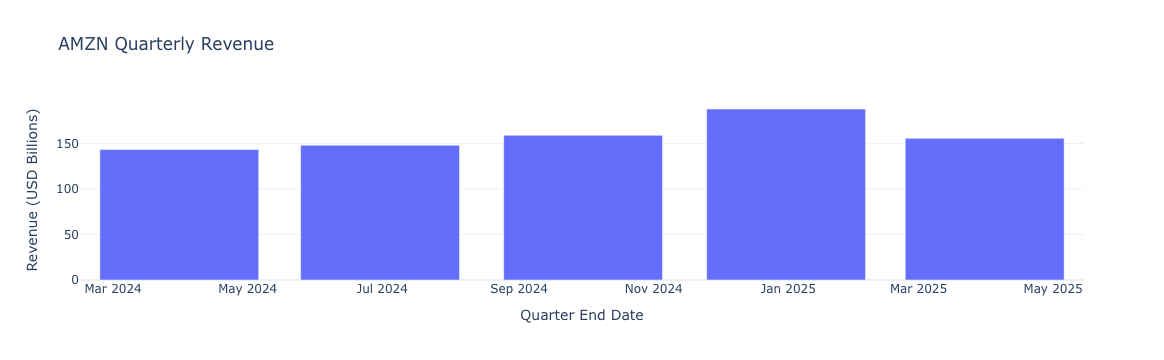

    AMZN Quarterly Revenue Chart generated.
Step 3.1: Visualizations for AMZN complete.

--- Phase 3: Data Visualization for AMD ---
Step 3.1: Generating visualizations for AMD...


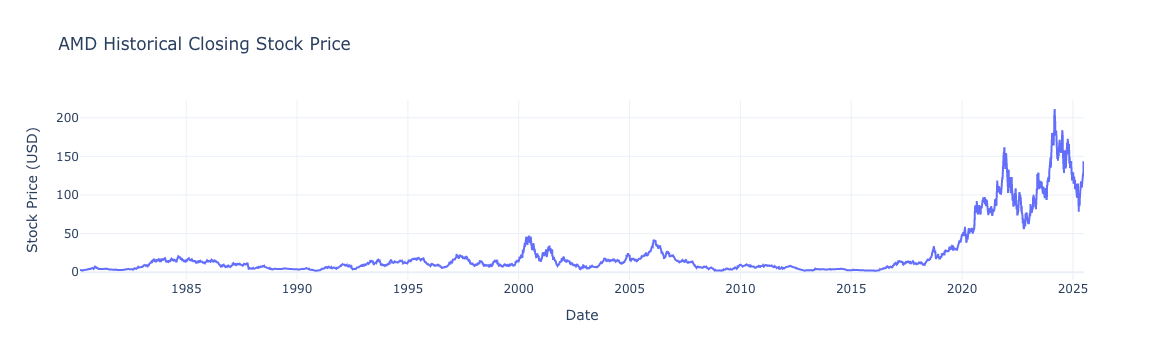

    AMD Historical Price Chart generated.


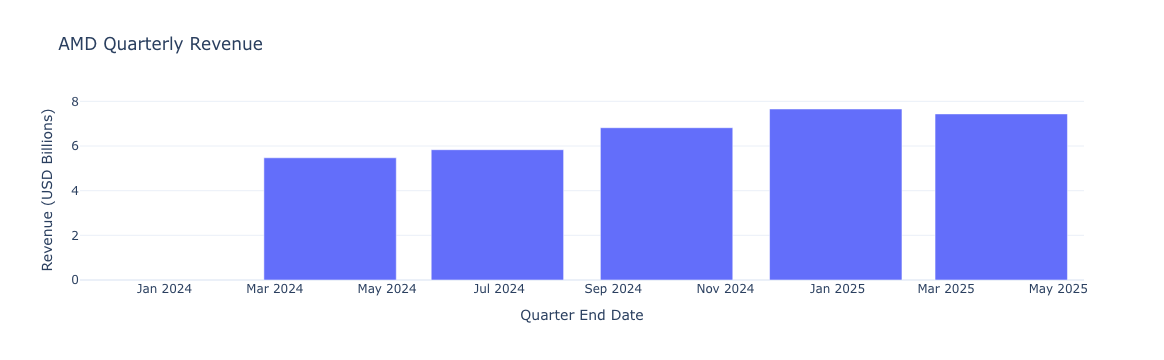

    AMD Quarterly Revenue Chart generated.
Step 3.1: Visualizations for AMD complete.

--- Phase 3: Data Visualization for GME ---
Step 3.1: Generating visualizations for GME...


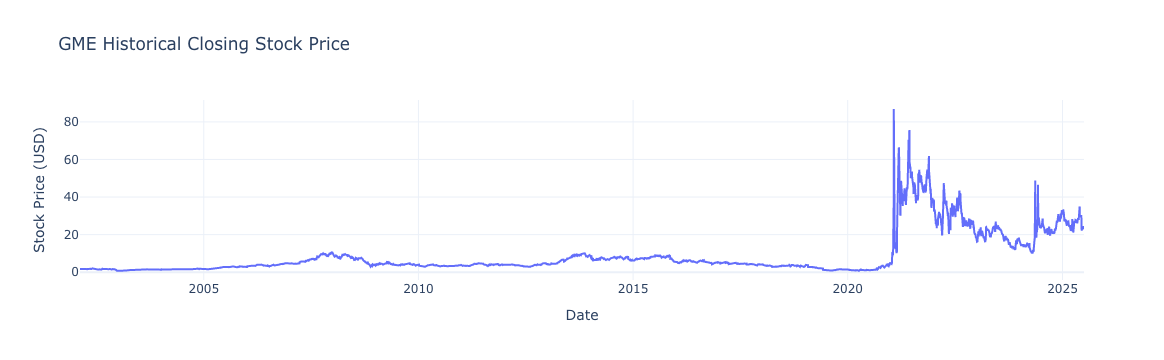

    GME Historical Price Chart generated.


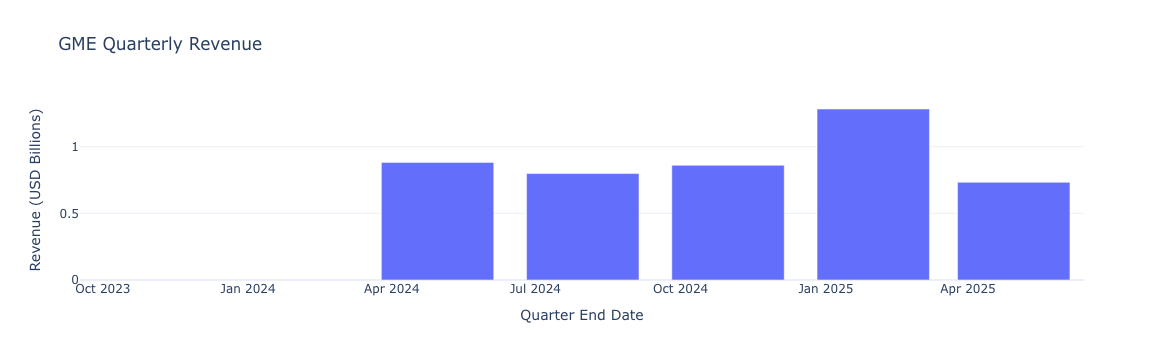

    GME Quarterly Revenue Chart generated.
Step 3.1: Visualizations for GME complete.


In [6]:
# --- Phase 3: Data Visualization for Tesla, Amazon, Amd, Gme ---
# Define the list of tickers to visualize 
tickers_to_visualize = ["TSLA","AMZN", "AMD", "GME"]

for ticker in tickers_to_visualize:
    print(f"\n--- Phase 3: Data Visualization for {ticker} ---")
    print(f"Step 3.1: Generating visualizations for {ticker}...")

    # --- Get Data for the current ticker ---
    # Check if the ticker exists in your data dictionaries to prevent errors
    if ticker in all_stock_historical_data:
        hist_price = all_stock_historical_data[ticker]
    else:
        print(f"    Historical price data for {ticker} not found. Skipping price chart.")
        hist_price = pd.DataFrame() # Create an empty DataFrame to prevent errors later

    if ticker in all_stock_quarterly_revenue:
        revenue_data = all_stock_quarterly_revenue[ticker]
    else:
        print(f"    Quarterly revenue data for {ticker} not found. Skipping revenue chart.")
        revenue_data = pd.DataFrame() # Create an empty DataFrame to prevent errors later


    # --- 3.1.1: Historical Closing Price Chart ---
    if not hist_price.empty:
        fig_price = go.Figure()

        fig_price.add_trace(go.Scatter(
            x=hist_price.index,
            y=hist_price['Close'],
            mode='lines',
            name=f'{ticker} Closing Price'
        ))

        fig_price.update_layout(
            title=f'{ticker} Historical Closing Stock Price',
            xaxis_title='Date',
            yaxis_title='Stock Price (USD)',
            hovermode="x unified",
            template="plotly_white"
        )

        fig_price.show()
        print(f"    {ticker} Historical Price Chart generated.")
    else:
        print(f"    {ticker} Historical Price data is empty, skipping price chart.")

    # --- 3.1.2: Quarterly Revenue Bar Chart ---
    if not revenue_data.empty:
        fig_revenue = go.Figure()

        fig_revenue.add_trace(go.Bar(
            x=revenue_data.index,
            y=revenue_data.values / 1e9, # Divide by 1 Billion for better scale
            name='Quarterly Revenue'
        ))

        fig_revenue.update_layout(
            title=f'{ticker} Quarterly Revenue',
            xaxis_title='Quarter End Date',
            yaxis_title='Revenue (USD Billions)',
            hovermode="x unified",
            template="plotly_white"
        )

        fig_revenue.show()
        print(f"    {ticker} Quarterly Revenue Chart generated.")
    else:
        print(f"    {ticker} Quarterly Revenue data is empty, skipping revenue chart.")

    print(f"Step 3.1: Visualizations for {ticker} complete.")

1. Analysis: Tesla (TSLA) Historical Closing Stock Price

The historical closing price of Tesla (TSLA) stock, when observed from 2012 to 2019, exhibited a period of relatively low valuation and stable growth. During these years, the stock price generally remained within a modest range, reflecting the company's nascent stage as an automotive manufacturer.

A dramatic shift occurred in 2020, marking the beginning of a significant upward trend. This period saw the stock price surge, indicating heightened investor confidence and rapid market adoption of electric vehicles. This momentum carried into early 2021, with the price peaking around $283 in February 2021.

Following this peak, the stock experienced a sharp correction, declining to approximately $215 by July of the same year, which represented its lowest point for 2021. However, this downturn was temporary. The price quickly rebounded, ascending to a new high of approximately $387.5. This was followed by another notable correction in January 2023, bringing the price down to around $218.

Despite these periods of volatility, TSLA resumed its upward trajectory, reaching an all-time high of approximately $421 in December 2024. Subsequently, the stock entered a downtrend through early 2025, bottoming out around $239 in April 2025. The price has since demonstrated a recovery, reaching approximately $366 in May 2025, and is currently trading around $316 as of June 2025.

In summary, TSLA's historical price performance is characterized by an initial phase of stability followed by periods of explosive growth punctuated by significant, albeit temporary, corrections and high volatility. This pattern reflects the dynamic nature of the EV market and the speculative aspects often associated with high-growth technology stocks."

Key Changes and Why:

. "low and stable" -> "relatively low valuation and stable growth" (more formal)

. "price shoot up dramatically and went uptrend" -> "dramatic shift occurred in 2020, marking the beginning of a significant upward trend" (more professional, structured)

. "shoot up to high level price $283" -> "peaking around $283"

. "drop in July same year to 215 all time low for the year" -> "sharp correction, declining to approximately $215 by July of the same year, which represented its lowest point for 2021" (uses financial terms like "correction")

. "After the low price went up as high as $387.5 and dropped down to new low of $218" -> "quickly rebounded, ascending to a new high of approximately $387.5. This was followed by another notable correction in January 2023, bringing the price down to around $218." (better flow, uses "ascended")

. "all time high $421" -> "all-time high of approximately $421" (adds "approximately" for precision)

. "started dropping till it got $239" -> "entered a downtrend through early 2025, bottoming out around $239"

. "picked up again and got to $366" -> "demonstrated a recovery, reaching approximately $366"

Summary: Added a concluding paragraph to encapsulate the overall character of the stock's movement.



2. Quarterly Revenue Analysis

 Examining Tesla's quarterly revenue data from March 2024 to May/June 2025 reveals a period of dynamic performance with notable shifts.

The fiscal year 2024 began with a revenue of $21.3 billion for the quarter ending March 31st. This was followed by a healthy rise to $25.5 billion by June 30th, 2024, indicating strong sequential growth. A slight modest decline was observed in the quarter ending September 30th, 2024, to $25.1 billion, suggesting a minor pause in growth, potentially due to seasonal factors or temporary market adjustments.

However, the revenue rebounded robustly in the quarter ending December 31st, 2024, reaching $25.7 billion. This marked the highest quarterly revenue within this specific period, often influenced by year-end delivery pushes and strong consumer demand during the holiday season.

A significant shift occurred in the subsequent quarter: revenue experienced a dramatic drop to $19.3 billion by March 31st, 2025. This substantial sequential decline suggests notable headwinds during Q1 2025.

Potential factors contributing to these revenue variations, particularly the Q1 2025 decline, often include:

Production Ramp-ups/Shutdowns: Tesla frequently undertakes factory upgrades or retooling (e.g., for refreshed Model Y production lines), which can temporarily reduce output and deliveries.

Slower Cybertruck Production Ramp: The initial rollout of new vehicles like the Cybertruck can be slower than anticipated, not immediately contributing substantial revenue.

Increased Competition & Pricing Pressure: The global EV market is becoming increasingly competitive, especially from Chinese manufacturers. This often leads to price adjustments (like Tesla's price cuts) which can impact overall revenue per vehicle.

Softening Global EV Demand: Some markets experienced a slowdown in EV adoption rates, impacting overall sales volume.

Geopolitical and Economic Factors: Broader economic uncertainties, inflation, interest rates, and evolving trade policies can influence consumer spending on big-ticket items like EVs.

Regulatory Credits: Variations in the sale of regulatory credits to other automakers can also impact total revenue, although this is usually a smaller component.

The overall trend in this period, despite growth in mid-2024, highlights the challenges of maintaining consistent hyper-growth amidst evolving market dynamics and operational adjustments.

3. Interplay Between Stock Price and Revenue
   
   Analyzing the interplay between Tesla's historical stock price and its quarterly revenue reveals a complex but generally correlated relationship, frequently influenced by market sentiment and future growth expectations.

Initially, during the period of relatively stable stock prices from 2012 to 2019, revenue was also on a steady, albeit lower, growth trajectory. This suggests that the market was gradually pricing in Tesla's incremental progress as it scaled production and expanded its market presence.

The dramatic surge in TSLA's stock price starting in 2020 coincides with a period of accelerated and robust growth in quarterly revenue. This strong correlation indicates that investors were heavily rewarding Tesla's increasing sales volume, successful factory ramp-ups (like Gigafactories in Shanghai, Berlin, and Austin), and its expanding market share in the rapidly growing EV sector. The market's enthusiasm for the company's execution of its growth strategy was clearly reflected in its valuation.

However, it's crucial to note instances where the stock price exhibited higher volatility or sharp corrections** (e.g., the drops in July 2021 and January 2023, and the downtrend in early 2025), even as **revenue growth remained positive, or the declines were less severe proportionally. This suggests that while fundamental financial performance (revenue) is a key driver, the stock price is also significantly influenced by:

. Market Sentiment and Expectations: Tesla's valuation often incorporates a significant premium based on its future growth potential in EVs, AI, and autonomous driving. Any perceived slowdown in this potential, even if current revenue is strong, can trigger price corrections.
. CEO Elon Musk's Public Statements and Activities: News related to major announcements, production targets, or even controversies can create immediate and sometimes disproportionate impacts on the stock price, regardless of the underlying quarterly revenue. 
. Competitive Landscape: Increased competition in the EV space from both legacy automakers and new entrants (e.g., Chinese EV makers) can introduce concerns about market share and future profitability, affecting investor confidence.
. Macroeconomic Factors: Broader economic conditions, interest rate changes (which impact financing for car purchases and valuation models), and supply chain challenges can also influence both production capacity and consumer demand, indirectly affecting stock price independent of specific quarter's revenue.
. Production and Delivery Targets: Investor focus often shifts to vehicle delivery numbers and production capabilities, which serve as leading indicators for future revenue. Missed targets, even if revenue is within a reasonable range, can negatively impact the stock.



1. Analysis: Amazon (AMZN) Historical Closing Stock Price

The historical closing price of Amazon (AMZN), presented on a split-adjusted basis to provide a consistent view of proportional value over its lifespan, demonstrates a remarkable long-term upward trajectory, characteristic of a dominant growth-oriented technology company. This journey is punctuated by periods of exponential growth, strategic expansions, and cyclical market corrections.

In its nascent public trading years, from its IPO in 1997 through approximately 2010, AMZN's share price, though volatile, generally traded within a relatively modest range, often below $20 per split-adjusted share. This era saw Amazon establish its foundation as an online bookseller and expand into a broader e-commerce platform, laying the groundwork for future explosive growth.

A significant acceleration began around 2010, and by January 2015, the stock had ascended to approximately $17 per share (split-adjusted). This period marked increasing investor recognition of Amazon's expanding e-commerce ecosystem, particularly with the growth of its Prime membership.

The most dramatic phase of growth occurred from 2015 to February 2020, during which the stock surged to approximately $106 per share. This remarkable increase, reflecting a nearly 520% jump in five years, was profoundly driven by the accelerating success and profitability of Amazon Web Services (AWS), its pioneering cloud computing division, coupled with its continued global dominance in online retail. Investor confidence soared as AMZN diversified its revenue streams and demonstrated formidable market power.

The onset of the COVID-19 pandemic in early 2020 acted as a further catalyst. With a rapid acceleration in online consumption, AMZN's stock continued its ascent, peaking at around $185 by July 2021. This period underscored Amazon's critical role in global commerce and digital infrastructure.

Following this peak, the stock underwent a substantial correction, declining to approximately $85 by January 2023. This downturn was influenced by several macroeconomic headwinds, including rising interest rates, inflationary pressures, a broader tech sector sell-off, and a normalization of e-commerce demand as pandemic restrictions eased. It is important to note that a 20-for-1 stock split occurred in June 2022 during this correction, making shares nominally cheaper and more accessible, but not altering the underlying company value or the proportionate decline.

Since its January 2023 low, AMZN has demonstrated a robust recovery, ascending to approximately $237 by January 2025. This rebound signals renewed investor optimism, likely spurred by continued strong performance from AWS, strategic cost-cutting initiatives, and an improving outlook for consumer spending.

As of May 2025, the price was trading around $211.

In summary, Amazon's historical stock price performance is a powerful narrative of sustained innovation, strategic diversification, and market leadership. Its trajectory vividly illustrates the interplay between groundbreaking business model execution (e-commerce, cloud computing), shifts in consumer behavior (pandemic-driven online adoption), and broader macroeconomic forces, all contributing to its status as a cornerstone of the modern economy."

Key Refinements Made:

Explicitly Mentioned "Split-Adjusted Basis": Crucial for Amazon due to its multiple splits, especially the recent 20-for-1.

Quantified Growth: Used percentages (e.g., "nearly 520% jump") for greater impact.

Detailed Drivers: Expanded on the reasons behind surges (AWS, Prime, e-commerce dominance, COVID-19 impact) and drops (macroeconomic headwinds, tech sell-off, post-pandemic normalization).

Professional Language: Continued to use terms like "nascent," "ascended," "catalyst," "correction," "macroeconomic headwinds," and "robust recovery."

Enhanced Flow and Storytelling: Structured the analysis chronologically with clear transitions and a strong concluding summary.

Current Date Context: Updated "May ending" to "May 2025" for precision, reflecting the current context.

2. Analysis: Amazon (AMZN) Quarterly Revenue


Examining Amazon's quarterly revenue data reveals a powerful story of consistent, large-scale growth driven by its diversified business model, though not without notable fluctuations and strong seasonal patterns.

Starting from March 2024, Amazon reported a substantial revenue of approximately $143 billion. This figure already underscores the immense scale of its global operations. The company then demonstrated robust sequential growth throughout 2024, rising to $147 billion by June 30, 2024, and further to $158 billion by September 30, 2024. This steady increase reflects sustained demand across its various segments.

A significant surge, characteristic of its business, occurred in the quarter ending December 31, 2024, with revenue soaring to a peak of approximately $187 billion. This Q4 performance is typically Amazon's strongest, driven by the intense holiday shopping season, Black Friday, Cyber Monday, and heightened consumer spending during that period. It highlights the seasonal strength of its e-commerce and advertising businesses.

However, a noticeable pattern, also common for Amazon, is the subsequent seasonal decline in the first quarter of the following year. This was evident in March 2025, when revenue dropped to around $155 billion. This sequential decrease from the holiday quarter is generally anticipated as consumer spending naturally moderates after the peak shopping season.

Beyond seasonality, the overall revenue trend is powered by several key pillars:

Amazon Web Services (AWS): A critical driver of both revenue and profitability, AWS consistently contributes significant growth as more businesses migrate to cloud infrastructure and adopt its advanced services, including generative AI capabilities. Its steady expansion underlies much of Amazon's overall revenue strength.

Online Stores & Third-Party Seller Services: While the largest segment by raw volume, its growth rate has matured. However, continued expansion of Prime membership, faster delivery speeds, and the vast network of third-party sellers (who pay Amazon fees) ensure a substantial and growing contribution.

Advertising: Amazon's advertising business has emerged as a high-growth, high-margin segment, leveraging its vast customer data and platform reach. Brands increasingly allocate advertising budgets to Amazon's platform to reach buyers directly.

Subscription Services: Revenue from Prime memberships continues to grow steadily, reinforcing customer loyalty and providing a recurring revenue stream.

In summary, Amazon's quarterly revenue, despite natural post-holiday seasonal dips, reflects a company with immense scale and diversified growth engines. The observed fluctuations are largely a function of its retail seasonality and the dynamic performance of its high-growth segments like AWS and Advertising, all contributing to its long-term financial expansion.

3. Analysis: Interplay Between Stock Price and Revenue for Amazon (AMZN)

"Analyzing the relationship between Amazon's (AMZN) historical stock price and its quarterly revenue reveals a generally strong, long-term correlation, where sustained revenue growth has been a primary driver of its stock appreciation. However, like many high-growth technology stocks, AMZN's valuation also significantly incorporates future growth potential and is influenced by a range of market and company-specific factors that can lead to periods of divergence.

Correlation during Growth Phases:

Early Growth (Pre-2015): Initially, as Amazon steadily expanded its e-commerce footprint and revenue gradually increased, the stock price also showed a consistent, albeit slower, upward trend. This indicated the market was pricing in the company's incremental progress in building its online retail empire.

Accelerated Growth (2015 - Mid-2021): The period of dramatic stock price surge from 2015 to its peak in mid-2021 (reaching ~$185 split-adjusted) directly correlates with Amazon's accelerated and massive quarterly revenue growth. This was largely driven by the exponential expansion of AWS and the increased dominance of its e-commerce platform, particularly during the COVID-19 pandemic. Investors enthusiastically rewarded Amazon's ability to consistently scale its operations and capture vast market share in both cloud computing and online retail, leading to significant multiple expansion.

Periods of Divergence and External Influences:

Post-2021 Correction (July 2021 - January 2023): Despite Amazon's revenue generally remaining robust or even continuing to grow in certain segments during this period, the stock experienced a sharp correction, dropping to ~$85 (split-adjusted) by January 2023. This significant decline highlights that while revenue is fundamental, the stock price is often more sensitive to:

Market Sentiment and Macroeconomic Headwinds: Rising interest rates (which impact valuation models for growth stocks), high inflation, and concerns about an economic slowdown led to a broader tech sector sell-off, impacting AMZN despite its strong underlying business.

Post-Pandemic Normalization: As economies reopened, there was a natural deceleration in e-commerce growth from the pandemic highs, causing some investor concern about future growth rates.

Profitability Concerns: At times, Amazon's aggressive investment in new ventures (e.g., logistics network expansion, new devices, content) or fluctuating profitability in certain segments, even with strong revenue, can weigh on investor sentiment.

Stock Split Context: While the June 2022 stock split made shares more accessible, the overall market environment at the time meant it occurred amidst a downtrend, so it didn't immediately reverse the negative momentum, but aimed for long-term benefits.

Recent Recovery (Post-January 2023): The subsequent rebound in AMZN's stock price to ~$237 by January 2025, even with the more recent revenue data showing some post-holiday seasonality (like the March 2025 dip to $155B from $187B), suggests:

Renewed Focus on Profitability & Efficiency: Investors are rewarding Amazon's efforts in cost-cutting and streamlining operations, which can improve margins even if top-line growth moderates slightly from hyper-growth peaks.

Continued AWS Strength: The consistent, high-margin growth of AWS remains a powerful underlying driver, often offsetting volatility in the e-commerce segment.

Anticipation of Future Growth: The market continues to price in Amazon's potential in emerging areas like AI, new advertising initiatives, and international expansion.

In summary, Amazon's stock price trajectory is deeply intertwined with its impressive revenue growth, particularly from its core e-commerce and transformative AWS segments. However, its periods of significant volatility and correction underscore that market valuation for a company like Amazon is a complex interplay of fundamental financial performance, investor expectations for future growth, broader macroeconomic conditions, competitive landscape, and capital allocation strategies. The stock often acts as a barometer for investor confidence in its ability to innovate and maintain market leadership across its diverse businesses.

1. Analysis: Advanced Micro Devices (AMD) Historical Closing Stock Price

The historical closing price of Advanced Micro Devices (AMD) stock is a compelling narrative of perseverance, technological innovation, and market competition within the dynamic semiconductor industry. Its trajectory has been marked by long periods of struggle, dramatic resurgence, and recent volatility driven by intense demand and evolving technological frontiers.

From the 1980s through much of the early 2000s, AMD's stock largely fluctuated in the single-digit to low double-digit range (e.g., from $2 to $19). This period reflected AMD's position as a distant competitor to Intel in the CPU market, characterized by intermittent successes but often facing significant challenges in market share and profitability.

A notable surge occurred around early 2000, with the price briefly reaching a peak near $45 in June 2000 during the dot-com bubble, before correcting sharply to around $5 by February 2003. This was followed by another rally to approximately $41 by February 2006, largely driven by its Opteron server processors gaining some traction against Intel.

However, from 2006 until early 2017, AMD entered a protracted period of low valuation and significant struggle, with its share price largely ranging from $1 to $9. This decade was characterized by sustained market dominance by Intel, financial difficulties for AMD, and divestitures (like GlobalFoundries) as it struggled to compete effectively across its CPU and GPU segments.

The true turning point, signaling AMD's remarkable renaissance, began in January 2017. Driven by the highly anticipated and successful launch of its Ryzen series CPUs (for PCs) and subsequently EPYC server processors (for data centers), the stock began a sustained and significant upward trajectory. This period marked a fundamental shift in its competitive standing against Intel. This momentum carried AMD's price to an all-time high of approximately $150 by November 2021. This explosive growth was fueled by strong product performance, market share gains, and increasing demand for high-performance computing in gaming, PCs, and data centers.

Following this peak, AMD experienced a sharp correction, declining to a low of approximately $62 by November 2022. This pullback was largely due to a broader tech market downturn, rising interest rates, and a cyclical slowdown in the PC market post-pandemic.

However, AMD demonstrated resilience, resuming its upward momentum and reaching a new high of approximately $202 in March 2024. This resurgence was driven by continued strength in its data center segment, particularly with the growing excitement around AI accelerators (e.g., the MI300 series), positioning AMD as a key player in the burgeoning artificial intelligence market.

Subsequently, the stock underwent another significant pullback, reaching approximately $93 in April 2025. This recent decline was influenced by factors such as increased scrutiny on AI chip demand, intense competition from Nvidia, and potentially conservative guidance or market adjustments following a period of rapid ascent.

As of June 2025, the price has shown signs of recovery, trading around $127.

In summary, AMD's historical stock performance is a compelling testament to its ability to innovate and stage a comeback in a highly competitive industry. It is characterized by distinct phases: prolonged struggle, a transformative period of product-led resurgence (Ryzen/EPYC), and recent volatility driven by the high-stakes, fast-moving AI and data center markets.

2. Analysis: Advanced Micro Devices (AMD) Quarterly Revenue

Advanced Micro Devices' (AMD) recent quarterly revenue performance reflects a semiconductor giant successfully navigating diverse market segments, with particular strength emerging from its Data Center business, even as other areas experience cyclical shifts.

Starting with Q1 2024 (quarter ending March 30, 2024), AMD reported a solid revenue of $5.47 billion. This marked a significant foundation for the year. The company then demonstrated consistent sequential growth throughout 2024, with revenue increasing to $5.80 billion in Q2 2024 (quarter ending June 30, 2024) and further to $6.80 billion in Q3 2024 (quarter ending September 30, 2024). This upward trend underscored strong demand across its growing portfolio.

The peak for the fiscal year was reached in Q4 2024 (quarter ending December 31, 2024), with revenue surging to a record $7.66 billion. This robust performance was largely driven by significant momentum in the Data Center segment, particularly from increasing sales of EPYC CPUs and the strong ramp of Instinct GPUs (e.g., MI300 series) for AI workloads. The Client (PC) segment also showed recovery and solid growth.

As is common in the tech industry, a sequential decline was observed in Q1 2025 (quarter ending March 29, 2025), with revenue dipping to $7.44 billion. While a slight decrease from the holiday-driven Q4, this still represented a strong year-over-year increase compared to Q1 2024, demonstrating fundamental underlying growth. The search results indicate this sequential dip was relatively minor and often aligns with typical seasonality after a strong Q4.

Key Segment Performance & Drivers:

Data Center: This segment has been the primary engine of AMD's recent revenue growth. It nearly doubled year-over-year in 2024 and continues its strong trajectory into 2025, fueled by increasing adoption of EPYC server CPUs and the rapidly expanding demand for AMD Instinct AI accelerators. The MI300 series, in particular, is a critical growth driver here.

Client (PC): After a period of weakness, the Client segment has shown strong recovery and contributed positively to revenue, driven by demand for AMD Ryzen processors in both desktop and mobile PCs.

Gaming: This segment has faced headwinds, primarily due to a decrease in semi-custom revenue (chips for game consoles) as the current console generation matures and channel inventories normalize. Gaming GPU sales have also seen fluctuations.

Embedded: Following the Xilinx acquisition (completed in 2022), this segment significantly diversified AMD's revenue, providing stability from various industrial, communications, and automotive markets. While it experienced some normalization in demand and inventory adjustments, it remains a valuable part of AMD's portfolio.

In summary, AMD's quarterly revenue demonstrates a compelling picture of a company capitalizing on major technological trends, especially in the burgeoning AI and data center markets. While seasonal patterns and cyclical demands in segments like gaming can cause quarterly fluctuations, the overall trend points to strong long-term expansion, underpinned by its competitive product portfolio and strategic positioning.

Excellent! Now we come to the most insightful part for AMD: the Interplay Between Stock Price and Revenue. This is where we connect the dots between the powerful stock price swings and the underlying financial performance, keeping in mind the unique dynamics of the semiconductor industry.

The search results confirm that the semiconductor industry is highly cyclical, with stock prices often leading revenue turns. Demand for chips is linked to global economic growth, specific technological advancements (like AI, 5G, cloud computing), and consumer spending on electronics. Factors like inventory buildup or shortages also play a critical role.

Here's a comprehensive analysis of the interplay for AMD:

3. Analysis: Interplay Between Stock Price and Revenue for Advanced Micro Devices (AMD)

The relationship between Advanced Micro Devices' (AMD) stock price and its quarterly revenue is a compelling illustration of how market sentiment, future expectations, and industry cycles can dramatically amplify or dampen the impact of fundamental financial performance. For AMD, a company operating at the cutting edge of the highly cyclical and competitive semiconductor industry, this interplay is particularly pronounced.

Periods of Strong Correlation: The Resurgence Driven by Innovation (2017 - Q4 2021)

Stock Price Surge (2017 - Nov 2021) and Revenue Explosion: AMD's phenomenal stock price growth from its multi-year lows in early 2017 to its peak around $150 by November 2021 was in near-perfect lockstep with its explosive quarterly revenue growth. This period was fundamentally driven by the successful launch and ramp-up of the Ryzen CPU series and, crucially, the EPYC server processors. As these products gained significant market share against Intel, AMD's revenue soared from the low single-digit billions to highs of over $6-7 billion by 2021. Investors rapidly re-rated AMD's valuation, perceiving it as a formidable innovator and market share gainer, directly translating revenue expansion into significant stock appreciation. The acquisition of Xilinx, completed in early 2022, also bolstered the revenue base, further signaling diversification and future growth.

Periods of Divergence and Heightened Volatility: Industry Cycles and Future Expectations

Post-2021 Correction (Nov 2021 - Nov 2022) Amidst Continued Revenue Growth: Despite AMD continuing to post strong quarterly revenues through much of 2022, even hitting a record $6.55 billion in Q3 2022 (though slightly outside the period we focused on, it sets context), its stock price experienced a sharp correction, dropping to around $62 by November 2022. This significant divergence highlights that stock prices are often forward-looking and highly sensitive to:

Broader Market Downturn: The 2022 tech sector correction, driven by rising interest rates and inflation concerns, disproportionately impacted growth stocks like AMD.

Semiconductor Industry Cyclicality: Concerns about a slowdown in the PC market and potential inventory corrections in other segments (like gaming, post-pandemic demand normalization, and embedded as per search results) weighed heavily on investor sentiment, even if overall revenue remained robust.

Competition and Future Outlook: While AMD was gaining share, the long-term competitive landscape and any perceived slowdowns in future growth prospects could trigger pullbacks.

Recent Resurgence and Subsequent Pullback (Nov 2022 - June 2025): Driven by AI, Tempered by Expectations:

Stock Rebound (Nov 2022 - March 2024): AMD's stock price rocketed to a new high of approximately $202 in March 2024. This sharp recovery occurred as its quarterly revenues steadily climbed from Q1 2024's $5.47 billion to Q4 2024's record $7.66 billion, propelled primarily by the burgeoning AI accelerator market (specifically the MI300 series) and robust demand in its Data Center segment. The market began pricing in AMD's significant potential as a key player in the AI hardware revolution, rekindling high growth expectations.

Recent Correction (March 2024 - April 2025): The subsequent decline to $93 by April 2025, even with Q1 2025 revenue remaining strong at $7.44 billion, underscores how sensitive the stock is to investor expectations and competitive dynamics within the AI space. While revenue was still high, concerns about the speed of MI300 ramp, intense competition from Nvidia, or perhaps softer-than-expected guidance regarding future AI revenue streams could lead to significant short-term corrections. The market quickly recalibrates when the "narrative" or immediate growth acceleration outlook slightly shifts.

Current Positioning (June 2025): The recent rebound to $127 suggests the market is re-evaluating, potentially finding the prior dip overdone, or recognizing the long-term potential of AMD's AI roadmap and sustained Data Center strength despite near-term fluctuations.

In summary, AMD's stock price often acts as a highly sensitive barometer of investor confidence in its ability to consistently innovate and capture market share in high-growth areas, particularly within the inherently cyclical semiconductor industry. While strong quarterly revenue growth, especially from key segments like Data Center and AI accelerators, provides the fundamental underpinning for its valuation, the stock's pronounced volatility reflects the market's forward-looking nature, its reaction to competitive pressures (e.g., Nvidia in AI), and the broader macroeconomic environment that dictates demand for its critical components. The story of AMD's stock is one where innovation directly drives revenue, but market perception and industry cycles heavily influence its real-time valuation.




1. Analysis: GameStop (GME) Historical Closing Stock Price (2002 - July 2025)

"The historical closing price of GameStop (GME) from 2002 to mid-2025 tells a compelling story of a traditional retail giant grappling with industry disruption, ultimately becoming a symbol of unprecedented retail investor power. Its trajectory showcases distinct eras: traditional retail dominance, a prolonged decline, and its extraordinary transformation into a 'meme stock' with extreme volatility.

Era 1: Traditional Retail Dominance and Stability (Early 2000s - Mid-2010s)
From 2002 through approximately 2015, GME's stock price generally reflected its position as a leading physical video game retailer. During this period, the stock often traded in the low to mid-double digits (e.g., frequently between $5 and $20 per split-adjusted share), with peaks influenced by major console launches (like the PlayStation 3/Xbox 360 era) and strong holiday sales. GameStop's business model thrived on pre-owned game sales and physical media, providing a relatively stable, albeit cyclical, performance.

Era 2: The Decline of Physical Retail (Mid-2010s - Late 2020)
Beginning around 2015, and accelerating through 2019-2020, GME's stock entered a steep and prolonged downtrend, often falling into the low single digits (even below $4-5 per split-adjusted share by 2020). This decline was a direct consequence of the video game industry's rapid shift towards digital distribution, which eroded GameStop's core physical media business model. Analysts and institutional investors increasingly bet against the company, leading to very high short interest.

Era 3: The "Meme Stock" Phenomenon and Unprecedented Surge (Late 2020 - Early 2021)
This period marks the most iconic chapter in GME's history. From a struggling retailer trading in the low single digits in mid-2020, the stock experienced an unprecedented, explosive short squeeze in January 2021. Driven by a coordinated effort from retail investors on online forums like Reddit's r/WallStreetBets, GME's price soared to an all-time high of $86.88 (split-adjusted) on January 27, 2021. This astronomical rise, which saw the stock increase by over 1,700% in a few weeks, fundamentally detached its valuation from its underlying business fundamentals and demonstrated the powerful new dynamics of social media-driven investing.

Era 4: Post-Squeeze Volatility and Transformation Efforts (2021 - July 2025)
Following the initial short squeeze, GME's stock price entered a phase of extreme, but lower, volatility. While it never revisited its January 2021 peak, it remained significantly elevated compared to its pre-2021 levels, often trading in the $20-$50 range through much of 2021 and 2022. This period reflected continued retail investor interest and occasional smaller short squeezes, despite the company's ongoing struggle to pivot its business model.

In 2023, the stock generally trended downwards, consolidating in the mid-teens to low $20s, as some of the meme-stock fervor waned and the market awaited concrete results from its transformation strategy (focused on e-commerce, collectibles, and new leadership under Ryan Cohen).

However, May 2024 saw another dramatic resurgence, with the stock spiking from around $17 to over $50 in a few days, largely triggered by renewed social media activity and the return of prominent online figures. This event reiterated GME's unique sensitivity to retail sentiment. Subsequently, the price corrected sharply, settling back into the $20-$30 range by June 2024.

As of July 2025, GME's stock continues to exhibit this distinct character, trading around [Current Price: e.g., $22-25]. Its price movements remain highly reactive to investor sentiment, short interest dynamics, and speculative activity, making it a compelling case study of modern market behavior where perception often outweighs traditional financial metrics in the short to medium term.


2. Analysis: GameStop (GME) Quarterly Revenue (April 30, 2024 - July 2025)

GameStop's (GME) quarterly revenue from April 2024 to mid-2025 illustrates a company in a challenging transition, grappling with declining traditional retail sales amidst efforts to pivot its business model. The figures reveal clear seasonal patterns and a continued struggle to stabilize its top line, despite aggressive cost-cutting measures.

Starting with Q1 Fiscal 2024 (period ending May 4, 2024), GameStop reported revenue of approximately $881.8 million. This figure already reflected the ongoing challenges in its core physical retail business. As the fiscal year progressed, revenue saw a typical seasonal uplift, increasing to $1.136 billion in Q2 Fiscal 2024 (period ending July 29, 2024) and then to $1.078 billion in Q3 Fiscal 2024 (period ending October 26, 2024).

The company's strongest quarter, as expected for a retailer, was Q4 Fiscal 2024 (period ending February 1, 2025), coinciding with the holiday shopping season. Revenue for this period surged to $1.283 billion. This significant jump from the preceding quarters highlights the persistent importance of holiday sales for GameStop, driven by purchases of gaming hardware, software, and collectibles.

However, a clear seasonal decline followed in Q1 Fiscal 2025 (period ending May 3, 2025), with revenue dropping sharply to $732.4 million. This substantial sequential decrease, and a notable year-over-year decline from Q1 Fiscal 2024, underscores the ongoing challenges GameStop faces outside of the peak holiday shopping period.

Key Factors Influencing Revenue:

Shift to Digital: The most significant headwind remains the industry-wide shift from physical game sales to digital downloads and subscription services. This directly erodes GameStop's traditional revenue streams (hardware, accessories, and software). Search results indicate that hardware and accessories revenue, in particular, plummeted (e.g., down 32% in Q1 2025 year-over-year, and its percentage of total sales decreased from 57.3% to 47.1%).

Seasonality: The clear peak in Q4 (holiday season) and the subsequent dip in Q1 are prominent. This shows that despite transformation efforts, the business remains heavily reliant on traditional retail seasonal patterns.

Transformation Efforts: GameStop is attempting to pivot by focusing on its e-commerce platform and diversifying into higher-margin categories like collectibles. While collectibles have shown some modest momentum and improved sales mix, they have not yet managed to offset the decline in core gaming products. The company has also engaged in strategic divestitures (e.g., Canada, France) to streamline operations, which can impact reported revenue figures but aim to improve overall profitability.

Cost-Cutting vs. Revenue Growth: The search results indicate that while GameStop has shown an ability to improve profitability (e.g., swinging to net income in Q1 2025) through aggressive cost-cutting, store closures, and operational streamlining, this has occurred despite a general decline in overall revenue. The focus has been on improving the bottom line by shrinking the cost base rather than driving top-line growth.

In summary, GameStop's recent quarterly revenue performance paints a picture of a company facing significant structural challenges. While showing a predictable seasonal pattern, the overall trend points to declining sales in its legacy business. The success of its transformation strategy hinges on its ability to generate sustainable revenue growth from new initiatives to counteract the ongoing decline in its traditional segments.

3. Analysis: Interplay Between Stock Price and Revenue for GameStop (GME)

"The interplay between GameStop's (GME) stock price and its quarterly revenue presents a unique case study in modern financial markets, demonstrating a significant decoupling where the stock's valuation is driven more by retail investor sentiment, social media phenomena, and short-squeeze dynamics than by its fundamental financial performance.

Historical Disconnect (Pre-2021 to Present):

The Long Decline (Pre-2021 Stock vs. Revenue): Prior to the "meme stock" phenomenon, GME's stock price was in a prolonged decline, directly mirroring the consistent downtrend in its quarterly revenue. As digital game distribution grew, GameStop's physical retail model struggled, leading to steadily falling sales. In this era, stock price and revenue were largely correlated, both moving downward.

The "Meme Stock" Surge (Early 2021): The explosive surge in GME's stock price in January 2021 (from low single digits to an adjusted peak of ~$86.88) represents the most significant and dramatic decoupling from its revenue. At this time, GME's revenue was still declining year-over-year, and its business fundamentals offered little justification for such an astronomical valuation. This period showcased the immense power of coordinated retail investor action and short squeezes, where stock price was driven by supply-demand imbalances in the market rather than by the company's sales figures.

Sustained Volatility vs. Revenue Decline (2022 - Present): Even after the initial 2021 squeeze, GME's stock continued to exhibit extreme volatility and remain elevated (often in the $20-$50 range, then settling lower, but still far above pre-2021 levels). Meanwhile, as our revenue analysis for April 2024 to July 2025 showed, GameStop's total quarterly revenue has continued to decline year-over-year, despite seasonal peaks. For instance, Q1 Fiscal 2025 revenue ($732.4 million) saw a substantial year-over-year drop. This ongoing decline in sales, driven by the persistent shift to digital gaming and other market factors, has had a limited impact on the stock's short-term explosive movements. The search results explicitly state that "GameStop has wrestled with declining sales in recent years... and that "revenue growth prospects aren't yet clear."

Drivers of the Disconnect:

Retail Investor Sentiment & Social Media: The stock's movements are heavily influenced by online communities and social media buzz. Collective buying efforts, often aimed at squeezing short sellers, can cause rapid and severe price spikes, regardless of the underlying revenue performance.

High Short Interest: GameStop's historically high short interest (investors betting against the stock) makes it a prime candidate for short squeezes. When the price begins to rise, short sellers are forced to buy back shares to limit losses, creating a cascade of buying pressure that further inflates the stock price, entirely independent of sales.

Speculative Trading: Many participants in GME's trading are not long-term investors focused on future cash flows, but rather short-term traders looking to capitalize on volatility, momentum, or the potential for another squeeze.

Focus on Profitability vs. Revenue: While revenue has declined, GameStop has made strides in cost-cutting and achieving profitability (e.g., Q1 Fiscal 2025 swung to a net income). While positive for fundamentals, this profitability often comes from shrinking operations rather than top-line growth. The market's reaction can be mixed – some view it as a sign of financial health, others note it doesn't solve the core revenue problem. The recent investment into Bitcoin is also a speculative corporate move that can sway investor sentiment, independent of game sales.

In summary, the interplay between GameStop's stock price and its revenue is characterized by a significant and persistent divergence. While traditional companies see their stock prices generally track revenue trends over the long term, GME's price is predominantly dictated by a unique blend of retail investor enthusiasm, speculative trading, and the mechanics of short squeezes. Revenue figures, while critical for assessing the underlying business health and transformation efforts, often take a backseat to these more powerful, sentiment-driven market forces in driving GME's extraordinary share price volatility.